## Holiday Package Problem

### Problem Statement
"Trips & Travel.Com" company wants to enable and establish a viable business model to expand the customer base. One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information. The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being. However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.


### Content
What's inside is more than just rows and columns. Make it easy for others to get started by describing how you acquired the data and what time period it represents, too.

Most important features that have an impact on Product taken: Designation, Passport, Tier City, Martial status, occupation
Customers with Designation as Executive should be the target customers for the company .Customers who have passport and are from tier 3 city and are single or unmarried, have large business such customers have higher chances of taking new package.
Customers monthly income in range of 15000- 25000, and age range 15-30, prefer 5 star properties also have higher chances of taking new package based on EDA.
### Inspiration
We need to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.

### Tasks to Solve :
To predict which customer is more likely to purchase the newly introduced travel package
Which variables are most significant.
Which segment of customers should be targeted more.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import warnings
import plotly.express as px

warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('Datasets/Travel.csv')
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


## Data Cleaning

1. Handle Missing Values
2. Handle Duplicate Values
3. Check Data Type
4. Understand the dataset

In [6]:
df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [8]:
## Check for Null Values:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [14]:
#Check all the categories
df['Gender'] = df['Gender'].str.replace('Fe Male', 'Female')
df['Gender'].value_counts()

Gender
Male      2916
Female    1972
Name: count, dtype: int64

In [9]:
df['Occupation'].value_counts()

Occupation
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: count, dtype: int64

In [10]:
df['TypeofContact'].value_counts()

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64

In [11]:
df['ProductPitched'].value_counts()

ProductPitched
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: count, dtype: int64

In [15]:
df['MaritalStatus'] = df['MaritalStatus'].str.replace('Single', 'Unmarried')
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Unmarried    1598
Divorced      950
Name: count, dtype: int64

In [13]:
df['Designation'].value_counts()

Designation
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: count, dtype: int64

In [16]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [17]:
df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [20]:
##Check missing values
features_with_na = [features for features in df.columns if df[features].isnull().sum() >= 1]

In [26]:
features_with_na

['Age',
 'TypeofContact',
 'DurationOfPitch',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'NumberOfChildrenVisiting',
 'MonthlyIncome']

In [22]:
for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean() * 100, 5), '% missing values')

Age 4.62357 % missing values
TypeofContact 0.51146 % missing values
DurationOfPitch 5.13502 % missing values
NumberOfFollowups 0.92062 % missing values
PreferredPropertyStar 0.53191 % missing values
NumberOfTrips 2.86416 % missing values
NumberOfChildrenVisiting 1.35025 % missing values
MonthlyIncome 4.76678 % missing values


In [23]:
##Statistics on numerical values
df[features_with_na].select_dtypes(exclude='object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


### Imputing null values
1. Impute Meadian value for Age Column
2. Impute Mode Value for Type of Contract
3. Impute Median for Duration of Pitch
4. Impute Mode for Number of FollowUp as it is Discrete feature
5. Impute Mode for Preferred Property Star
6. Impute Median for Number of trips
7. Impute Mode for Number of Children Visiting
8. Impute Median for MonthlyIncome

In [27]:
# Age - Median
df.Age.fillna(df.Age.median(), inplace=True)

# Type of Contact - Mode
df.TypeofContact.fillna(df.TypeofContact.mode()[0], inplace=True)

# Duration of Pitch - Median
df.DurationOfPitch.fillna(df.DurationOfPitch.median(), inplace=True)

# Number of Followups - Mode
df.NumberOfFollowups.fillna(df.NumberOfFollowups.mode()[0], inplace=True)

# Preferred Property Star - Mode
df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.mode()[0], inplace=True)

# Number of Trips - Median
df.NumberOfTrips.fillna(df.NumberOfTrips.median(), inplace=True)

# Number of Children Visiting - Mode
df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.mode()[0], inplace=True)

# Monthly Income - Median
df.MonthlyIncome.fillna(df.MonthlyIncome.median(), inplace=True)

In [28]:
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [29]:
df.drop('CustomerID', inplace=True, axis=1)

In [30]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


## Feature Engineering
### Feature Extraction

In [31]:
#Create new column for feature
df['TotalVisiting'] = df['NumberOfPersonVisiting'] + df['NumberOfChildrenVisiting']
df.drop(columns=['NumberOfPersonVisiting', 'NumberOfChildrenVisiting'], inplace=True, axis=1)

In [32]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ProdTaken               4888 non-null   int64  
 1   Age                     4888 non-null   float64
 2   TypeofContact           4888 non-null   object 
 3   CityTier                4888 non-null   int64  
 4   DurationOfPitch         4888 non-null   float64
 5   Occupation              4888 non-null   object 
 6   Gender                  4888 non-null   object 
 7   NumberOfFollowups       4888 non-null   float64
 8   ProductPitched          4888 non-null   object 
 9   PreferredPropertyStar   4888 non-null   float64
 10  MaritalStatus           4888 non-null   object 
 11  NumberOfTrips           4888 non-null   float64
 12  Passport                4888 non-null   int64  
 13  PitchSatisfactionScore  4888 non-null   int64  
 14  OwnCar                  4888 non-null   

In [34]:
##Get all numeric features
num_features = [features for features in df.columns if df[features].dtype != 'O']

In [38]:
print(f"Number of numerical features: {len(num_features)}")

Number of numerical features: 12


In [41]:
##Get all Categorical features
cat_features = [features for features in df.columns if df[features].dtype == 'O']
print(f"Number of Categorical features: {len(cat_features)}")

Number of Categorical features: 6


In [45]:
#discrete features
discrete_features = [features for features in num_features if len(df[features].unique()) <= 25]
print(f"Number of Discrete features: {len(discrete_features)}")

Number of Discrete features: 9


In [46]:
#Continous features
continous_features = [features for features in num_features if features not in discrete_features]
print(f"Number of Continous features: {len(continous_features)}")

Number of Discrete features: 3


In [47]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


## Feature Engineering Advanced -  Column Transformer, OHE, Label Encoding

## Train Test Split

In [48]:
from sklearn.model_selection import train_test_split

X = df.drop(['ProdTaken'], axis=1)
y = df['ProdTaken']

In [49]:
X.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [51]:
y.value_counts()

ProdTaken
0    3968
1     920
Name: count, dtype: int64

In [53]:
X_train.shape, X_test.shape, y_train.shape

((3421, 17), (1467, 17), (3421,))

In [54]:
## Create Column Transformer with 3 types of transformers
cat_features = X.select_dtypes(include='object').columns
num_features = X.select_dtypes(exclude='object').columns

In [55]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop='first')

ct = ColumnTransformer([
    ("OneHotEncoder", oh_transformer, cat_features),
    ("StandardScaler", numeric_transformer, num_features)
])

In [56]:
X_train = ct.fit_transform(X_train)

In [57]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,-0.714031,-0.649789,0.280718,-0.727208,-1.217370,-0.632714,1.409081,0.781435,0.460318,-0.067869
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.714031,-0.527737,-0.719632,1.768057,1.504605,-0.632714,1.409081,-1.279697,-1.005668,-0.777901
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.714031,-0.161582,1.281068,1.768057,-0.672975,1.580492,-0.046813,0.781435,-1.209722,-0.067869
3,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.470853,-0.771841,0.280718,0.520424,-0.128580,1.580492,-0.046813,0.781435,-0.017750,0.642163
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.714031,-0.527737,1.281068,0.520424,2.593396,-0.632714,0.681134,-1.279697,-0.423411,-0.067869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3416,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.714031,-0.649789,1.281068,-0.727208,-0.672975,-0.632714,-1.502707,0.781435,-0.531926,0.642163
3417,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.470853,-0.893893,-0.719632,1.768057,-1.217370,-0.632714,1.409081,0.781435,1.512744,-0.067869
3418,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.470853,1.547143,0.280718,-0.727208,2.049001,-0.632714,-0.774760,0.781435,-0.357400,0.642163
3419,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.470853,1.791246,1.281068,-0.727208,-0.128580,-0.632714,-1.502707,0.781435,-0.250765,0.642163


In [58]:
X_test = ct.transform(X_test)

## Random Forest Classifier Technique

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, recall_score, \
    precision_score, roc_auc_score

In [79]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

In [80]:
for key, value in models.items():
    print(f'key:{key} and value:{value}')

key:Logistic Regression and value:LogisticRegression()
key:Random Forest and value:RandomForestClassifier()
key:Decision Tree and value:DecisionTreeClassifier()


In [81]:
list(models)

['Logistic Regression', 'Random Forest', 'Decision Tree']

In [84]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)  #Train model

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # -------------------- Training Metrics --------------------
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred)
    model_train_precision = precision_score(y_train, y_train_pred)
    model_train_recall = recall_score(y_train, y_train_pred)
    model_train_auc = roc_auc_score(y_train, y_train_pred)

    train_conf_matrix = confusion_matrix(y_train, y_train_pred)
    train_class_report = classification_report(y_train, y_train_pred)

    print(f'Model : {list(models.keys())[i]}')

    print("\n===== TRAINING METRICS =====")
    print(f"Accuracy: {model_train_accuracy:.4f}")
    print(f"F1 Score: {model_train_f1:.4f}")
    print(f"Precision: {model_train_precision:.4f}")
    print(f"Recall: {model_train_recall:.4f}")
    print(f"AUC: {model_train_auc:.4f}")
    print("\nConfusion Matrix:\n", train_conf_matrix)
    print("\nClassification Report:\n", train_class_report)

    # -------------------- Test Metrics --------------------
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred)
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_auc = roc_auc_score(y_test, y_test_pred)

    test_conf_matrix = confusion_matrix(y_test, y_test_pred)
    test_class_report = classification_report(y_test, y_test_pred)

    print("\n===== TEST METRICS =====")
    print(f"Accuracy: {model_test_accuracy:.4f}")
    print(f"F1 Score: {model_test_f1:.4f}")
    print(f"Precision: {model_test_precision:.4f}")
    print(f"Recall: {model_test_recall:.4f}")
    print(f"AUC: {model_test_auc:.4f}")
    print("\nConfusion Matrix:\n", test_conf_matrix)
    print("\nClassification Report:\n", test_class_report)

    print("==" *30)

Model : Logistic Regression

===== TRAINING METRICS =====
Accuracy: 0.8451
F1 Score: 0.4252
Precision: 0.7101
Recall: 0.3034
AUC: 0.6373

Confusion Matrix:
 [[2695   80]
 [ 450  196]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91      2775
           1       0.71      0.30      0.43       646

    accuracy                           0.85      3421
   macro avg       0.78      0.64      0.67      3421
weighted avg       0.83      0.85      0.82      3421


===== TEST METRICS =====
Accuracy: 0.8432
F1 Score: 0.4279
Precision: 0.6719
Recall: 0.3139
AUC: 0.6393

Confusion Matrix:
 [[1151   42]
 [ 188   86]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91      1193
           1       0.67      0.31      0.43       274

    accuracy                           0.84      1467
   macro avg       0.77      0.64      0.67      1467
weighted avg   

## HyperParameter Tuning

In [85]:
rf_params = {
    'max_depth':[5,8,15,None,10],
    'max_features':[5,7,'auto',8],
    'min_samples_split':[2,8,15,20],
    'n_estimators':[100,200,500,1000]
}

In [86]:
rf_params

{'max_depth': [5, 8, 15, None, 10],
 'max_features': [5, 7, 'auto', 8],
 'min_samples_split': [2, 8, 15, 20],
 'n_estimators': [100, 200, 500, 1000]}

In [87]:
##models list for HyperParameter Tuning
randomcv_models=[("RF",RandomForestClassifier(), rf_params)]

In [89]:
from sklearn.model_selection import RandomizedSearchCV
model_params={}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                param_distributions=params,
                                n_iter=100,
                                cv=3,
                                verbose=2,
                                n_jobs=-1)

    random.fit(X_train, y_train)
    model_params[name] = random.best_params_

for model_name in model_params:
    print(f'---------------- Best Params for model {model_name} ---------------------')
    print(model_params[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
---------------- Best Params for model RF ---------------------
{'n_estimators': 1000, 'min_samples_split': 2, 'max_features': 8, 'max_depth': 15}


In [90]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=1000, min_samples_split=2, max_features=8, max_depth=15)
}

In [91]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)  #Train model

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # -------------------- Training Metrics --------------------
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred)
    model_train_precision = precision_score(y_train, y_train_pred)
    model_train_recall = recall_score(y_train, y_train_pred)
    model_train_auc = roc_auc_score(y_train, y_train_pred)

    train_conf_matrix = confusion_matrix(y_train, y_train_pred)
    train_class_report = classification_report(y_train, y_train_pred)

    print(f'Model : {list(models.keys())[i]}')

    print("\n===== TRAINING METRICS =====")
    print(f"Accuracy: {model_train_accuracy:.4f}")
    print(f"F1 Score: {model_train_f1:.4f}")
    print(f"Precision: {model_train_precision:.4f}")
    print(f"Recall: {model_train_recall:.4f}")
    print(f"AUC: {model_train_auc:.4f}")
    print("\nConfusion Matrix:\n", train_conf_matrix)
    print("\nClassification Report:\n", train_class_report)

    # -------------------- Test Metrics --------------------
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred)
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_auc = roc_auc_score(y_test, y_test_pred)

    test_conf_matrix = confusion_matrix(y_test, y_test_pred)
    test_class_report = classification_report(y_test, y_test_pred)

    print("\n===== TEST METRICS =====")
    print(f"Accuracy: {model_test_accuracy:.4f}")
    print(f"F1 Score: {model_test_f1:.4f}")
    print(f"Precision: {model_test_precision:.4f}")
    print(f"Recall: {model_test_recall:.4f}")
    print(f"AUC: {model_test_auc:.4f}")
    print("\nConfusion Matrix:\n", test_conf_matrix)
    print("\nClassification Report:\n", test_class_report)

    print("==" *30)

Model : Random Forest

===== TRAINING METRICS =====
Accuracy: 0.9994
F1 Score: 0.9984
Precision: 1.0000
Recall: 0.9969
AUC: 0.9985

Confusion Matrix:
 [[2775    0]
 [   2  644]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2775
           1       1.00      1.00      1.00       646

    accuracy                           1.00      3421
   macro avg       1.00      1.00      1.00      3421
weighted avg       1.00      1.00      1.00      3421


===== TEST METRICS =====
Accuracy: 0.9250
F1 Score: 0.7629
Precision: 0.9316
Recall: 0.6460
AUC: 0.8175

Confusion Matrix:
 [[1180   13]
 [  97  177]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.96      1193
           1       0.93      0.65      0.76       274

    accuracy                           0.93      1467
   macro avg       0.93      0.82      0.86      1467
weighted avg       0.

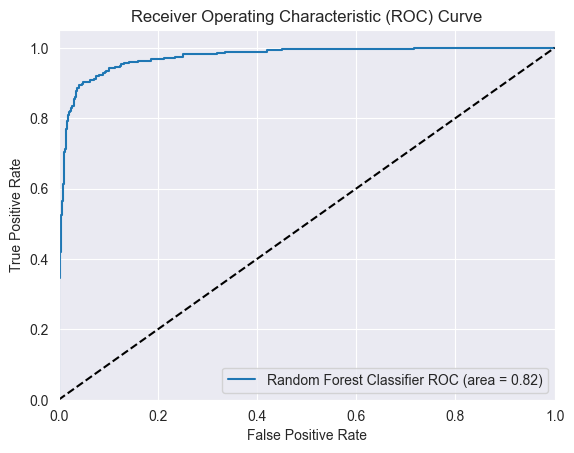

In [92]:
# Plot ROC AUC Curve
from sklearn.metrics import roc_curve
plt.figure()

# Add the models to the list that you want to view on the ROC plot
auc_models = [{
    'label': 'Random Forest Classifier',
    'model': RandomForestClassifier(n_estimators=1000, min_samples_split=2, max_features=8, max_depth=15),
    'auc': model_test_auc
}]

# Create loop through all the models
for algo in auc_models:
    model = algo['model']
    model.fit(X_train, y_train)

    # Compute false positive rate and true positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

    # Plot ROC curve with AUC label
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))

# Plot the diagonal reference line
plt.plot([0, 1], [0, 1], 'k--')

# Set axis limits, labels and title
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

# Show legend
plt.legend(loc='lower right')

# Show plot
plt.show()
